In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt


In [19]:
def read_trees(filename):
    """ Read the tree data into a dictionary """
    with open(filename, 'r') as file:
        tree_data = json.load(file)
    return tree_data


In [20]:
def gps_to_xy(gps_lon, gps_lat, boundary, size=(1000,1000)):
    """ Map gps latitude and longitude coordinates to
    array coordinates based on the boundaries given as 
    (min_longitude, max_longitude, min_latitude, max_latitude) 
    and the size (width, height) of the array. 
    Return (x,y) grid coordinates - two INTEGERS. 
    
    HINT:   (min_longitude, max_latitude) => (0,0)
            (max_longitude, min_latitude) => (1000, 1000)
            
    When plotting images:
        - the (0,0) is in the UPPER LEFT
        - x is DOWN:   Increasing x is decreasing LATITUDE
        - y is ACROSS: Increasing y is increasing LONGITUDE
    """
    min_long, max_long, min_lat, max_lat = boundary
    x = int((gps_lon - min_long) / (max_long - min_long) * size[0])
    y = int((max_lat - gps_lat) / (max_lat - min_lat) * size[1])
    return x, y


In [21]:
def plot_trees(grid, title=""):
    """ Plot the map of trees """
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    plt.imshow(grid, cmap='magma')
    plt.savefig("treemap.png")


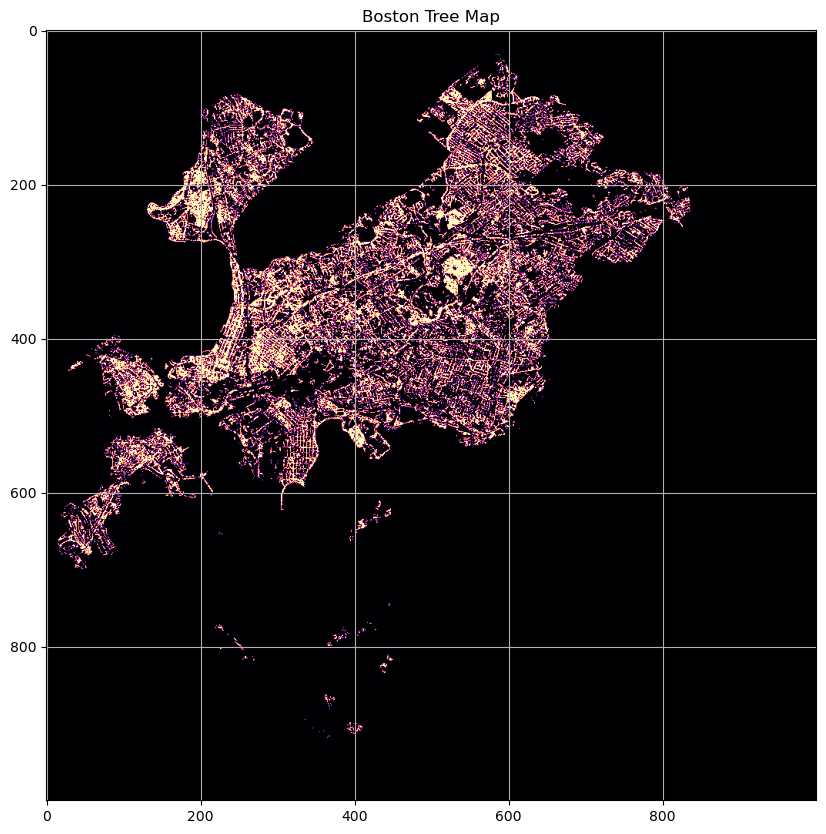

In [22]:
def main():
    
    # 1. Set up map boundaries
    # (minlon, maxlon, minlat, maxlat)    
    boston = (-71.2, -70.9, 42.2, 42.4 )
    northeastern = (-71.12, -71.05, 42.32, 42.36)

    # 2. Set up a positionary grid covering your boundary
    grid_size = (1000,1000)   
    grid = np.zeros(shape=grid_size)   # Our grid is 1000 x 1000
    
    # 3. Read the geojson data into a dictionary
    tree_data = read_trees(r"/Users/cike/Trees-of-Boston/trees.geojson")

    # 4. For each tree in the dataset ....
    for tree in tree_data['features']:
        #    a. Extract the tree's gps location 
        gps_lon = tree['geometry']['coordinates'][0]
        gps_lat = tree['geometry']['coordinates'][1]

        #    b. Convert to (x,y) grid coordinates
        x, y = gps_to_xy(gps_lon, gps_lat, boston)
    
        #    c. If the tree is in bounds, set it in the grid
        if 0 <= x < 1000 and 0 <= y < 1000:
            grid[x, y] = 1

    # 5. Visualize your map
    plot_trees(grid, "Boston Tree Map")
    
if __name__ == '__main__':
    main()


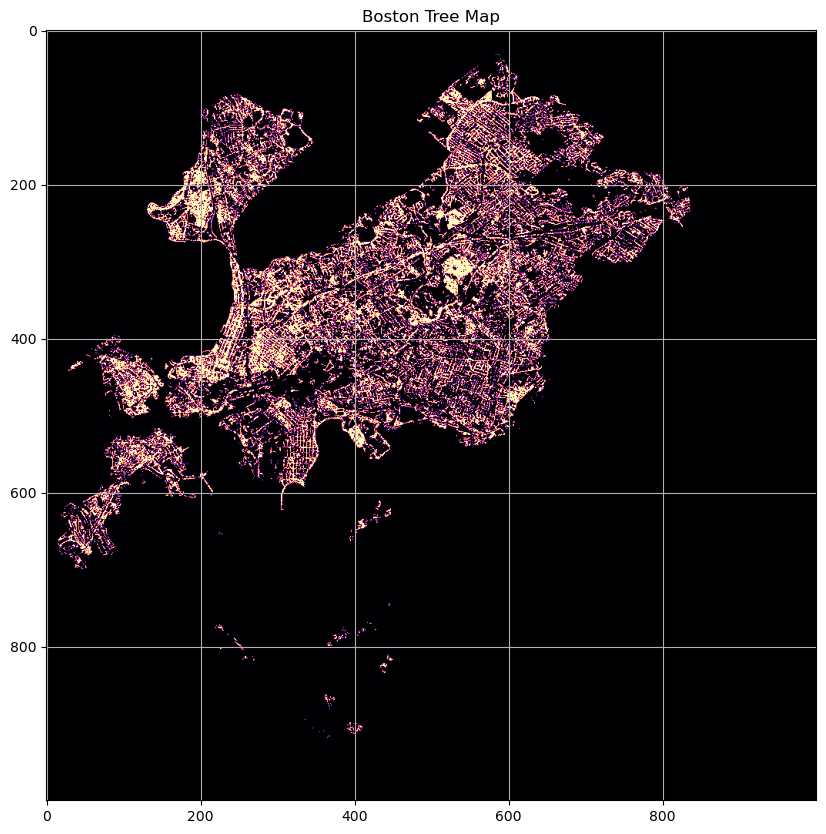

In [23]:
main()
